#  Indian Summers Data Analysis & Visualization


## Project Overview

This notebook explores and analyzes temperature data across major Indian cities during the summer seasons from **2007 to 2021**. The primary objective is to understand temperature trends, identify the hottest regions, and visualize patterns using different types of plots like bar charts, line graphs, heatmaps, and more.

The notebook follows a structured approach:
1. Data Loading & Inspection
2. Data Cleaning
3. Exploratory Data Analysis (EDA)
4. Data Visualization (including heatmaps and city-wise trends)

##  About the Dataset

The dataset is a collection of **daily weather data** for Indian cities during the **summer months (typically March to June)**. It includes:
- **City Name**
- **Date**
- **Temperature metrics**: Max, Min, Average
- **Feels-like temperature**
- **Humidity, Dew Point, Wind Speed, Visibility**
- **Sunrise/Sunset times**
- **Weather conditions** (e.g., Clear, Cloudy)
- **Meteorological metadata** (optional)

There are **three main files**:
1. **`Indian Summers - Over the years-2007-11.csv`** – Historical summer data from 2007 to 2011.
2. **`Indian Summers - Over the years.csv`** – More recent summer data (including 2021).
3. **`indian_summers_metadata.csv`** – Metadata explaining each column’s meaning and units.


## Used Libraries
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    import plotly.express as px
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots

## Initial Data Inspection

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking plots
plt.style.use('default')
sns.set_palette("husl")

### Load all three csv files 

In [2]:
df_main = pd.read_csv("Indian Summers - Over the years-2007-11.csv")
df_2007_11 = pd.read_csv("Indian Summers - Over the years.csv") 
df_meta = pd.read_csv("indian_summers_metadata.csv")

### Performing EDA (Exploratory Data Analysis)

In [3]:
df_main.head()


,City,Date,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed,winddir,sealevelpressure,cloudcover,visibility,sunrise,sunset,moonphase,conditions,description
0,Surat,2011-04-01,32.7,21.1,27.1,33.4,21.1,27.9,19.1,62.6,26.3,271.0,1010.9,0.0,4.0,2011-04-01 06:32:20,2011-04-01 18:53:18,0.99,Clear,Clear conditions throughout the day.
1,Surat,2011-04-02,32.4,25.0,27.1,34.7,25.0,27.8,21.3,71.7,25.6,250.3,1010.3,0.0,3.5,2011-04-02 06:31:25,2011-04-02 18:53:36,1.00,Clear,Clear conditions throughout the day.
2,Surat,2011-04-03,31.7,23.4,27.0,32.9,23.4,27.4,19.7,66.1,22.3,261.9,1010.5,0.0,4.0,2011-04-03 06:30:32,2011-04-03 18:53:55,1.00,Clear,Clear conditions throughout the day.
3,Surat,2011-04-04,35.9,20.1,27.5,33.4,20.1,27.3,16.1,54.6,20.5,231.2,1010.1,0.0,4.0,2011-04-04 06:29:38,2011-04-04 18:54:13,0.00,Clear,Clear conditions throughout the day.
4,Surat,2011-04-05,35.4,21.2,28.4,34.0,21.2,28.4,17.0,52.7,22.7,226.0,1010.0,2.4,4.0,2011-04-05 06:28:45,2011-04-05 18:54:32,0.02,Clear,Clear conditions throughout the day.


In [4]:
df_2007_11.head()

,City,Date,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed,winddir,sealevelpressure,cloudcover,visibility,sunrise,sunset,moonphase,conditions,description
0,New Delhi,2021-04-01,34.0,19.0,27.1,31.6,19.0,26.1,3.1,22.60,22.8,272.9,1002.8,0.0,3.1,2021-04-01 06:11:12,2021-04-01 18:39:13,0.60,Clear,Clear conditions throughout the day.
1,New Delhi,2021-04-02,33.9,16.0,25.8,31.8,16.0,24.9,4.5,27.62,12.4,275.0,1006.2,0.0,3.5,2021-04-02 06:10:04,2021-04-02 18:39:46,0.65,Clear,Clear conditions throughout the day.
2,New Delhi,2021-04-03,34.8,14.6,26.0,32.2,14.6,25.1,1.3,23.18,16.5,127.5,1008.8,1.4,3.5,2021-04-03 06:08:55,2021-04-03 18:40:19,0.70,Clear,Clear conditions throughout the day.
3,New Delhi,2021-04-04,36.8,16.9,27.1,34.2,16.9,26.0,4.8,28.00,18.3,157.6,1009.5,2.6,3.2,2021-04-04 06:07:47,2021-04-04 18:40:53,0.76,Clear,Clear conditions throughout the day.
4,New Delhi,2021-04-05,38.8,21.0,29.9,37.1,21.0,28.9,8.1,28.85,13.5,100.4,1007.8,38.4,3.1,2021-04-05 06:06:39,2021-04-05 18:41:26,0.81,Partially cloudy,Partly cloudy throughout the day.


In [5]:
df_meta.head()

,COLUMN,Description,Units of Measurement
0,NaN,NaN,NaN
1,tempax,Maximum temperature over the day,Celcius
2,tempmin,Minimum temperature over the day,Celcius
3,temp,Temperature for most hours of the day,Celcius
4,feelslikemax,"Combination of temperature, wind chill & heat ...",Celcius


In [6]:
df_main.info()
df_2007_11.info()
df_meta.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6732 entries, 0 to 6731
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   City              6732 non-null   object 
 1   Date              6732 non-null   object 
 2   tempmax           6729 non-null   float64
 3   tempmin           6729 non-null   float64
 4   temp              6729 non-null   float64
 5   feelslikemax      6729 non-null   float64
 6   feelslikemin      6729 non-null   float64
 7   feelslike         6729 non-null   float64
 8   dew               6729 non-null   float64
 9   humidity          6729 non-null   float64
 10  windspeed         6729 non-null   float64
 11  winddir           5361 non-null   float64
 12  sealevelpressure  2535 non-null   float64
 13  cloudcover        6729 non-null   float64
 14  visibility        6697 non-null   float64
 15  sunrise           6732 non-null   object 
 16  sunset            6732 non-null   object 


#### Merging datasets 


In [7]:
df_combined = pd.concat([df_main, df_2007_11], ignore_index=True)

df_combined.head()

,City,Date,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed,winddir,sealevelpressure,cloudcover,visibility,sunrise,sunset,moonphase,conditions,description
0,Surat,2011-04-01,32.7,21.1,27.1,33.4,21.1,27.9,19.1,62.6,26.3,271.0,1010.9,0.0,4.0,2011-04-01 06:32:20,2011-04-01 18:53:18,0.99,Clear,Clear conditions throughout the day.
1,Surat,2011-04-02,32.4,25.0,27.1,34.7,25.0,27.8,21.3,71.7,25.6,250.3,1010.3,0.0,3.5,2011-04-02 06:31:25,2011-04-02 18:53:36,1.00,Clear,Clear conditions throughout the day.
2,Surat,2011-04-03,31.7,23.4,27.0,32.9,23.4,27.4,19.7,66.1,22.3,261.9,1010.5,0.0,4.0,2011-04-03 06:30:32,2011-04-03 18:53:55,1.00,Clear,Clear conditions throughout the day.
3,Surat,2011-04-04,35.9,20.1,27.5,33.4,20.1,27.3,16.1,54.6,20.5,231.2,1010.1,0.0,4.0,2011-04-04 06:29:38,2011-04-04 18:54:13,0.00,Clear,Clear conditions throughout the day.
4,Surat,2011-04-05,35.4,21.2,28.4,34.0,21.2,28.4,17.0,52.7,22.7,226.0,1010.0,2.4,4.0,2011-04-05 06:28:45,2011-04-05 18:54:32,0.02,Clear,Clear conditions throughout the day.


#### Dealing with duplicate value

In [8]:
df_combined.duplicated().sum()

91

In [9]:
# drop duplicate values as per to make data clean and error free

df_combined.drop_duplicates(inplace=True)

In [10]:
# then took copy of all edit dataset to back to a new variable df (data frame)

df = df_combined.copy()

### Dealing with date and time type

In [11]:

# Converted 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extracted 'Year' and 'Month' for analysis
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Dropped rows with missing values in important columns
df.dropna(subset=[
    'tempmax', 'tempmin', 'temp',
    'humidity', 'windspeed', 'cloudcover',
    'dew', 'sealevelpressure'
], inplace=True)

# ✅ Reset index after cleaning
df.reset_index(drop=True, inplace=True)

### Dealing with Outliers

In [12]:

# function to detect outliers in numeric columns
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] < lower) | (data[column] > upper)]

# Check outliers in 'temp'
outliers_temp = detect_outliers_iqr(df, 'temp')
print(f"Outliers in 'temp': {len(outliers_temp)}")



Outliers in 'temp': 128


### Removed outliers

In [13]:
# Removed outliers from 'temp' only
df = df[~df.index.isin(outliers_temp.index)]

## Visualization & Analysis

Now let's proceed with comprehensive data visualization and analysis. We'll create 15 different charts to understand various aspects of Indian summer weather patterns, following the same structure as our interactive dashboard.

In [14]:
# Calculate outlier statistics
Q1 = df['temp'].quantile(0.25)
Q3 = df['temp'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count potential outliers
outliers_below = len(df[df['temp'] < lower_bound])
outliers_above = len(df[df['temp'] > upper_bound])
total_outliers = outliers_below + outliers_above
outlier_percentage = (total_outliers / len(df)) * 100

print("🌡️ Temperature Distribution & Outlier Statistics:")
print(f"📊 Q1 (25th percentile): {Q1:.2f}°C")
print(f"📊 Q3 (75th percentile): {Q3:.2f}°C")
print(f"📊 IQR (Interquartile Range): {IQR:.2f}°C")
print(f"🔻 Lower Bound: {lower_bound:.2f}°C")
print(f"🔺 Upper Bound: {upper_bound:.2f}°C")
print(f"⚠️ Outliers below range: {outliers_below}")
print(f"⚠️ Outliers above range: {outliers_above}")
print(f"📈 Total outliers: {total_outliers} ({outlier_percentage:.2f}% of data)")

# Create violin plot for temperature distribution
fig = px.violin(df, y='temp', box=True,
               title="Temperature Distribution with Outlier Detection",
               color_discrete_sequence=['#FF6B35'])

# Add horizontal lines for outlier bounds
fig.add_hline(y=lower_bound, line_dash="dash", line_color="red", 
             annotation_text=f"Lower Bound: {lower_bound:.1f}°C")
fig.add_hline(y=upper_bound, line_dash="dash", line_color="red", 
             annotation_text=f"Upper Bound: {upper_bound:.1f}°C")
fig.add_hline(y=Q1, line_dash="dot", line_color="blue", 
             annotation_text=f"Q1: {Q1:.1f}°C")
fig.add_hline(y=Q3, line_dash="dot", line_color="blue", 
             annotation_text=f"Q3: {Q3:.1f}°C")

fig.update_layout(height=600, showlegend=False)
fig.update_yaxes(title_text="Temperature (°C)")

fig.show()

print(f"\n📋 Analysis Summary:")
print(f"The violin plot reveals the temperature distribution and outlier detection boundaries.")
print(f"During preprocessing, extreme outliers were identified and removed to ensure data quality.")
print(f"The shape shows density distribution with quartiles and outlier boundaries clearly marked.")

🌡️ Temperature Distribution & Outlier Statistics:
📊 Q1 (25th percentile): 29.40°C
📊 Q3 (75th percentile): 33.10°C
📊 IQR (Interquartile Range): 3.70°C
🔻 Lower Bound: 23.85°C
🔺 Upper Bound: 38.65°C
⚠️ Outliers below range: 0
⚠️ Outliers above range: 0
📈 Total outliers: 0 (0.00% of data)



📋 Analysis Summary:
The violin plot reveals the temperature distribution and outlier detection boundaries.
During preprocessing, extreme outliers were identified and removed to ensure data quality.
The shape shows density distribution with quartiles and outlier boundaries clearly marked.


## Comprehensive Charts & Visualizations (15 Charts)

Now let's create 15 different visualizations to analyze various aspects of Indian summer weather patterns. Each chart will provide unique insights into temperature trends, weather relationships, and climate patterns.

### Chart 1: Temperature Trends Over Years

In [15]:
# Chart 1: Temperature Trend Over Years
yearly_temp = df.groupby('Year').agg({
    'tempmax': 'mean',
    'tempmin': 'mean',
    'temp': 'mean'
}).reset_index()

fig1 = px.line(yearly_temp, x='Year', y=['tempmax', 'tempmin', 'temp'],
               title="Average Temperature Trends Over Years (2007-2021)",
               labels={'value': 'Temperature (°C)', 'variable': 'Temperature Type'},
               color_discrete_map={'tempmax': '#e74c3c', 'tempmin': '#3498db', 'temp': '#f39c12'})

fig1.update_layout(height=500, legend_title="Temperature Type")
fig1.show()

# Analysis
temp_trend = yearly_temp['temp'].diff().mean()
print("📊 Chart 1 Analysis - Temperature Trends Over Years:")
print(f"🌡️ Average yearly temperature change: {temp_trend:.3f}°C per year")
print(f"📈 Temperature range: {yearly_temp['temp'].min():.1f}°C to {yearly_temp['temp'].max():.1f}°C")
print(f"🔥 Hottest year: {yearly_temp.loc[yearly_temp['tempmax'].idxmax(), 'Year']} ({yearly_temp['tempmax'].max():.1f}°C)")
print(f"❄️ Coolest year: {yearly_temp.loc[yearly_temp['tempmin'].idxmin(), 'Year']} ({yearly_temp['tempmin'].min():.1f}°C)")
print("💡 This line chart shows the evolution of average, maximum, and minimum temperatures across all cities from 2007 to 2021, revealing climate trends and temperature variations over time.")

📊 Chart 1 Analysis - Temperature Trends Over Years:
🌡️ Average yearly temperature change: -0.072°C per year
📈 Temperature range: 29.8°C to 32.1°C
🔥 Hottest year: 2010 (38.3°C)
❄️ Coolest year: 2008 (24.6°C)
💡 This line chart shows the evolution of average, maximum, and minimum temperatures across all cities from 2007 to 2021, revealing climate trends and temperature variations over time.


### Chart 2: Average Temperature by City

In [16]:
# Chart 2: Average Temperature by City
city_temp = df.groupby('City')['temp'].mean().sort_values(ascending=False).reset_index()

fig2 = px.bar(city_temp, x='City', y='temp',
              title="Average Temperature by City (Ranked from Hottest to Coolest)",
              labels={'temp': 'Average Temperature (°C)'},
              color='temp',
              color_continuous_scale='Reds')

fig2.update_layout(height=500, xaxis_tickangle=45)
fig2.show()

# Analysis
hottest_city = city_temp.iloc[0]
coolest_city = city_temp.iloc[-1]
temp_range_cities = hottest_city['temp'] - coolest_city['temp']

print("📊 Chart 2 Analysis - Average Temperature by City:")
print(f"🔥 Hottest city: {hottest_city['City']} ({hottest_city['temp']:.1f}°C)")
print(f"❄️ Coolest city: {coolest_city['City']} ({coolest_city['temp']:.1f}°C)")
print(f"📏 Temperature range between cities: {temp_range_cities:.1f}°C")
print(f"📈 Cities analyzed: {len(city_temp)} locations")
print("💡 This bar chart ranks all cities from hottest to coolest based on average summer temperatures, revealing significant climate variations across different Indian regions.")

📊 Chart 2 Analysis - Average Temperature by City:
🔥 Hottest city: Ahmedabad (33.8°C)
❄️ Coolest city: Bengaluru (26.6°C)
📏 Temperature range between cities: 7.2°C
📈 Cities analyzed: 15 locations
💡 This bar chart ranks all cities from hottest to coolest based on average summer temperatures, revealing significant climate variations across different Indian regions.


### Chart 3: Monthly Temperature Distribution

In [17]:
# Chart 3: Monthly Temperature Distribution
month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
               7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

df['MonthName'] = df['Month'].map(month_names)

fig3 = px.box(df, x='MonthName', y='temp',
              title="Monthly Temperature Distribution (Box Plot)",
              labels={'temp': 'Temperature (°C)', 'MonthName': 'Month'},
              color='MonthName')

fig3.update_layout(height=500, showlegend=False)
fig3.show()

# Analysis
monthly_stats = df.groupby('Month')['temp'].agg(['mean', 'std', 'min', 'max']).reset_index()
monthly_stats['MonthName'] = monthly_stats['Month'].map(month_names)
hottest_month = monthly_stats.loc[monthly_stats['mean'].idxmax()]
coolest_month = monthly_stats.loc[monthly_stats['mean'].idxmin()]

print("📊 Chart 3 Analysis - Monthly Temperature Distribution:")
print(f"🔥 Hottest month: {hottest_month['MonthName']} (avg: {hottest_month['mean']:.1f}°C)")
print(f"❄️ Coolest month: {coolest_month['MonthName']} (avg: {coolest_month['mean']:.1f}°C)")
print(f"📏 Temperature variation: {hottest_month['mean'] - coolest_month['mean']:.1f}°C between months")
print(f"📈 Months covered: {df['Month'].nunique()} different months")
print("💡 This box plot reveals temperature distribution patterns for each month, showing median values, quartiles, and outliers across all cities and years.")

📊 Chart 3 Analysis - Monthly Temperature Distribution:
🔥 Hottest month: May (avg: 32.2°C)
❄️ Coolest month: Apr (avg: 30.6°C)
📏 Temperature variation: 1.6°C between months
📈 Months covered: 3 different months
💡 This box plot reveals temperature distribution patterns for each month, showing median values, quartiles, and outliers across all cities and years.


### Chart 4: Humidity vs Temperature Scatter Plot

In [18]:
# Chart 4: Humidity vs Temperature Scatter Plot
fig4 = px.scatter(df.sample(n=min(5000, len(df))), x='humidity', y='temp', 
                  color='windspeed',
                  title="Temperature vs Humidity Relationship (Color by Wind Speed)",
                  labels={'humidity': 'Humidity (%)', 'temp': 'Temperature (°C)'},
                  color_continuous_scale='Viridis')

fig4.update_layout(height=500)
fig4.show()

# Analysis
correlation = df['temp'].corr(df['humidity'])
temp_humidity_stats = df.groupby(pd.cut(df['humidity'], bins=5))['temp'].mean()

print("📊 Chart 4 Analysis - Humidity vs Temperature Relationship:")
print(f"📈 Correlation coefficient: {correlation:.3f}")
print(f"🔗 Relationship strength: {'Strong' if abs(correlation) > 0.7 else 'Moderate' if abs(correlation) > 0.3 else 'Weak'}")
print(f"📊 Temperature range: {df['temp'].min():.1f}°C to {df['temp'].max():.1f}°C")
print(f"💧 Humidity range: {df['humidity'].min():.1f}% to {df['humidity'].max():.1f}%")
print(f"💨 Wind speed range: {df['windspeed'].min():.1f} to {df['windspeed'].max():.1f} km/h")
print("💡 This scatter plot explores the relationship between temperature and humidity, with wind speed represented by color intensity, revealing climate interaction patterns.")

📊 Chart 4 Analysis - Humidity vs Temperature Relationship:
📈 Correlation coefficient: -0.563
🔗 Relationship strength: Moderate
📊 Temperature range: 23.9°C to 38.6°C
💧 Humidity range: 7.4% to 98.4%
💨 Wind speed range: 0.0 to 263.2 km/h
💡 This scatter plot explores the relationship between temperature and humidity, with wind speed represented by color intensity, revealing climate interaction patterns.


### Chart 5: Wind Speed Distribution

In [19]:
# Chart 5: Wind Speed Distribution
fig5 = px.histogram(df, x='windspeed', nbins=30,
                    title="Wind Speed Distribution Across All Cities",
                    labels={'windspeed': 'Wind Speed (km/h)', 'count': 'Frequency'},
                    color_discrete_sequence=['#2E86AB'])

fig5.update_layout(height=500)
fig5.show()

# Analysis
wind_stats = {
    'mean': df['windspeed'].mean(),
    'median': df['windspeed'].median(),
    'std': df['windspeed'].std(),
    'min': df['windspeed'].min(),
    'max': df['windspeed'].max()
}

print("📊 Chart 5 Analysis - Wind Speed Distribution:")
print(f"💨 Average wind speed: {wind_stats['mean']:.2f} km/h")
print(f"📊 Median wind speed: {wind_stats['median']:.2f} km/h")
print(f"📏 Standard deviation: {wind_stats['std']:.2f} km/h")
print(f"🌪️ Maximum recorded: {wind_stats['max']:.1f} km/h")
print(f"😴 Minimum recorded: {wind_stats['min']:.1f} km/h")
print("💡 This histogram shows the frequency distribution of wind speeds, revealing the most common wind conditions during Indian summers.")

📊 Chart 5 Analysis - Wind Speed Distribution:
💨 Average wind speed: 20.04 km/h
📊 Median wind speed: 18.40 km/h
📏 Standard deviation: 10.35 km/h
🌪️ Maximum recorded: 263.2 km/h
😴 Minimum recorded: 0.0 km/h
💡 This histogram shows the frequency distribution of wind speeds, revealing the most common wind conditions during Indian summers.


### Chart 6: Weather Conditions Distribution

In [20]:
# Chart 6: Weather Conditions Distribution
conditions_count = df['conditions'].value_counts().head(10)

fig6 = px.pie(values=conditions_count.values, names=conditions_count.index,
              title="Distribution of Weather Conditions (Top 10)",
              color_discrete_sequence=px.colors.qualitative.Set3)

fig6.update_layout(height=500)
fig6.show()

print("📊 Chart 6 Analysis - Weather Conditions Distribution:")
print(f"☀️ Most common condition: {conditions_count.index[0]} ({conditions_count.iloc[0]} occurrences)")
print(f"🌤️ Second most common: {conditions_count.index[1]} ({conditions_count.iloc[1]} occurrences)")
print(f"📈 Total unique conditions: {df['conditions'].nunique()}")
print(f"📊 Top condition percentage: {(conditions_count.iloc[0]/len(df)*100):.1f}%")
print("💡 This pie chart shows the distribution of different weather conditions, revealing the most frequent weather patterns during Indian summers.")

📊 Chart 6 Analysis - Weather Conditions Distribution:
☀️ Most common condition: Partially cloudy (6959 occurrences)
🌤️ Second most common: Clear (4083 occurrences)
📈 Total unique conditions: 6
📊 Top condition percentage: 53.7%
💡 This pie chart shows the distribution of different weather conditions, revealing the most frequent weather patterns during Indian summers.


### Chart 7: Temperature Heatmap by Year and Month

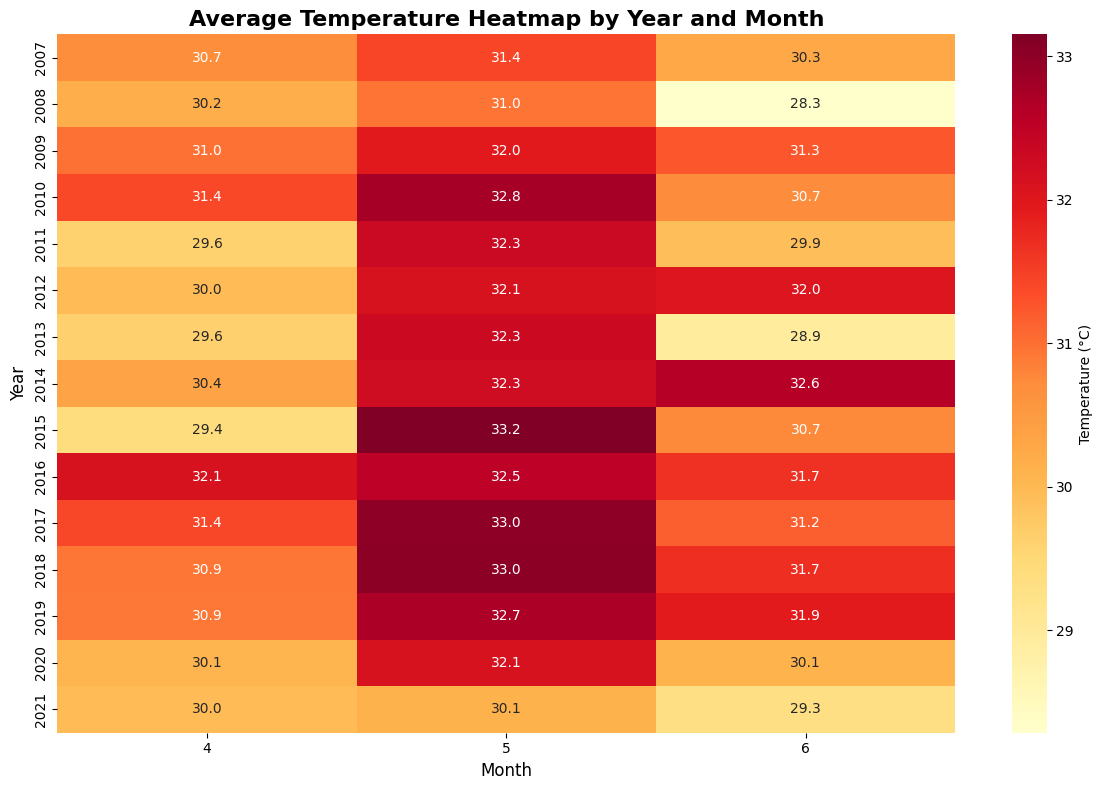

📊 Chart 7 Analysis - Temperature Heatmap by Year and Month:
🔥 Hottest period: Year 2015, Month 5 (33.2°C)
❄️ Coolest period: Year 2008, Month 6 (28.3°C)
📈 Temperature variation: 4.9°C
💡 This heatmap reveals temperature patterns across years and months, showing seasonal trends and inter-annual variations in climate.


In [21]:
# Chart 7: Temperature Heatmap by Year and Month
temp_pivot = df.groupby(['Year', 'Month'])['temp'].mean().reset_index()
temp_matrix = temp_pivot.pivot(index='Year', columns='Month', values='temp')

plt.figure(figsize=(12, 8))
sns.heatmap(temp_matrix, annot=True, fmt='.1f', cmap='YlOrRd', 
            cbar_kws={'label': 'Temperature (°C)'})
plt.title('Average Temperature Heatmap by Year and Month', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.tight_layout()
plt.show()

print("📊 Chart 7 Analysis - Temperature Heatmap by Year and Month:")
max_temp_idx = temp_matrix.stack().idxmax()
min_temp_idx = temp_matrix.stack().idxmin()
print(f"🔥 Hottest period: Year {max_temp_idx[0]}, Month {max_temp_idx[1]} ({temp_matrix.loc[max_temp_idx]:.1f}°C)")
print(f"❄️ Coolest period: Year {min_temp_idx[0]}, Month {min_temp_idx[1]} ({temp_matrix.loc[min_temp_idx]:.1f}°C)")
print(f"📈 Temperature variation: {temp_matrix.stack().max() - temp_matrix.stack().min():.1f}°C")
print("💡 This heatmap reveals temperature patterns across years and months, showing seasonal trends and inter-annual variations in climate.")

### Chart 8: Top 10 Hottest Cities

In [22]:
# Chart 8: Top 10 Hottest Cities
top_cities = df.groupby('City')['temp'].mean().sort_values(ascending=False).head(10).reset_index()

fig8 = px.bar(top_cities, x='temp', y='City', orientation='h',
              title="Top 10 Hottest Cities by Average Temperature",
              labels={'temp': 'Average Temperature (°C)', 'City': 'City'},
              color='temp',
              color_continuous_scale='Reds')

fig8.update_layout(height=500, yaxis={'categoryorder': 'total ascending'})
fig8.show()

print("📊 Chart 8 Analysis - Top 10 Hottest Cities:")
print(f"🔥 Hottest city: {top_cities.iloc[0]['City']} ({top_cities.iloc[0]['temp']:.1f}°C)")
print(f"🌡️ 10th hottest: {top_cities.iloc[9]['City']} ({top_cities.iloc[9]['temp']:.1f}°C)")
print(f"📏 Range in top 10: {top_cities.iloc[0]['temp'] - top_cities.iloc[9]['temp']:.1f}°C")
print("💡 This horizontal bar chart identifies the consistently hottest cities, providing insights into regional climate variations across India.")

📊 Chart 8 Analysis - Top 10 Hottest Cities:
🔥 Hottest city: Ahmedabad (33.8°C)
🌡️ 10th hottest: Patna (30.7°C)
📏 Range in top 10: 3.1°C
💡 This horizontal bar chart identifies the consistently hottest cities, providing insights into regional climate variations across India.


### Chart 9: Temperature vs Sea Level Pressure

In [23]:
# Chart 9: Temperature vs Sea Level Pressure
fig9 = px.scatter(df.sample(n=min(3000, len(df))), x='sealevelpressure', y='temp',
                  color='humidity', size='windspeed',
                  title="Temperature vs Sea Level Pressure (Color: Humidity, Size: Wind Speed)",
                  labels={'sealevelpressure': 'Sea Level Pressure (hPa)', 'temp': 'Temperature (°C)'},
                  color_continuous_scale='Blues')

fig9.update_layout(height=500)
fig9.show()

correlation_pressure = df['temp'].corr(df['sealevelpressure'])
print("📊 Chart 9 Analysis - Temperature vs Sea Level Pressure:")
print(f"📈 Correlation: {correlation_pressure:.3f}")
print(f"🌡️ Pressure range: {df['sealevelpressure'].min():.1f} to {df['sealevelpressure'].max():.1f} hPa")
print(f"🔗 Relationship: {'Inverse' if correlation_pressure < 0 else 'Direct'}")
print("💡 This scatter plot examines the relationship between atmospheric pressure and temperature, with humidity and wind speed as additional dimensions.")

📊 Chart 9 Analysis - Temperature vs Sea Level Pressure:
📈 Correlation: -0.352
🌡️ Pressure range: 908.5 to 1026.2 hPa
🔗 Relationship: Inverse
💡 This scatter plot examines the relationship between atmospheric pressure and temperature, with humidity and wind speed as additional dimensions.


### Chart 10: City-wise Temperature Trends Over Years

In [24]:
# Chart 10: City-wise Temperature Trends Over Years
top_5_cities = df.groupby('City')['temp'].mean().sort_values(ascending=False).head(5).index
city_yearly = df[df['City'].isin(top_5_cities)].groupby(['Year', 'City'])['temp'].mean().reset_index()

fig10 = px.line(city_yearly, x='Year', y='temp', color='City',
                title="Temperature Trends Over Years (Top 5 Hottest Cities)",
                labels={'temp': 'Average Temperature (°C)', 'Year': 'Year'})

fig10.update_layout(height=500)
fig10.show()

print("📊 Chart 10 Analysis - City-wise Temperature Trends:")
for city in top_5_cities:
    city_data = city_yearly[city_yearly['City'] == city]
    trend = city_data['temp'].iloc[-1] - city_data['temp'].iloc[0] if len(city_data) > 1 else 0
    print(f"🏙️ {city}: {trend:+.2f}°C change over period")
print("💡 This multi-line chart shows temperature evolution in the hottest cities, revealing individual city climate trends and patterns.")

📊 Chart 10 Analysis - City-wise Temperature Trends:
🏙️ Ahmedabad: -1.51°C change over period
🏙️ Jaipur: -1.27°C change over period
🏙️ New Delhi: -2.08°C change over period
🏙️ Kanpur: -0.97°C change over period
🏙️ Lucknow: -1.33°C change over period
💡 This multi-line chart shows temperature evolution in the hottest cities, revealing individual city climate trends and patterns.


### Chart 11: Correlation Matrix Heatmap

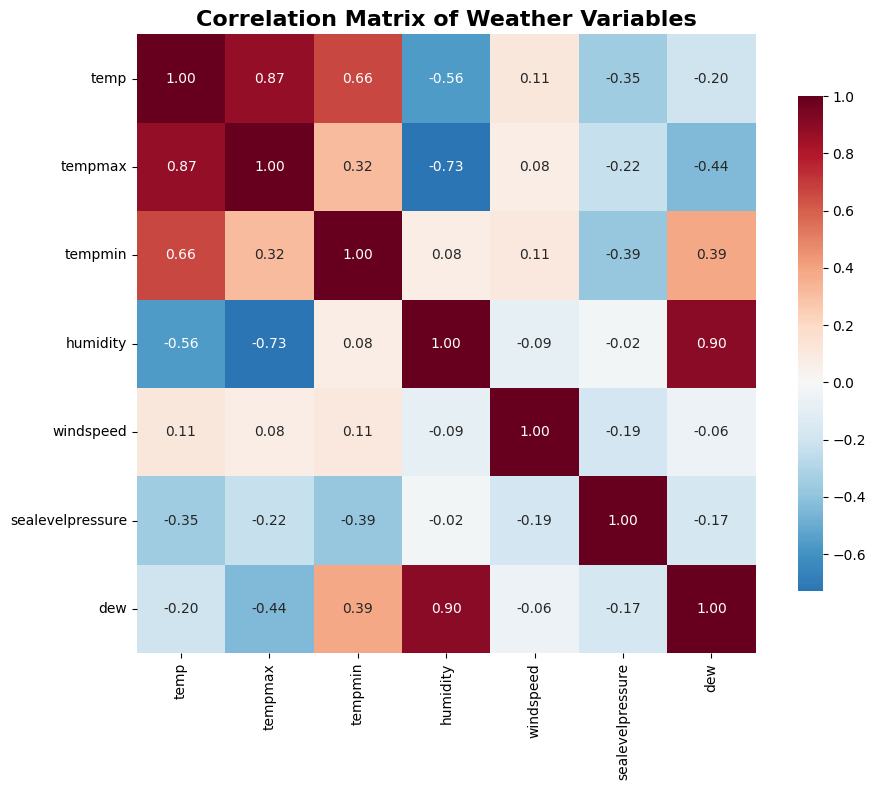

📊 Chart 11 Analysis - Correlation Matrix:
🔗 Strong correlations (|r| > 0.5):
   temp ↔ tempmax: 0.875
   temp ↔ tempmin: 0.663
   temp ↔ humidity: -0.563
   tempmax ↔ humidity: -0.730
   humidity ↔ dew: 0.904
💡 This correlation matrix reveals relationships between weather variables, helping identify patterns and interdependencies in climate data.


In [25]:
# Chart 11: Correlation Matrix Heatmap
numeric_cols = ['temp', 'tempmax', 'tempmin', 'humidity', 'windspeed', 'sealevelpressure', 'dew']
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0,
            square=True, fmt='.2f', cbar_kws={'shrink': .8})
plt.title('Correlation Matrix of Weather Variables', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("📊 Chart 11 Analysis - Correlation Matrix:")
strong_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.5:
            strong_correlations.append((correlation_matrix.columns[i], correlation_matrix.columns[j], corr_val))

print("🔗 Strong correlations (|r| > 0.5):")
for var1, var2, corr in strong_correlations:
    print(f"   {var1} ↔ {var2}: {corr:.3f}")
print("💡 This correlation matrix reveals relationships between weather variables, helping identify patterns and interdependencies in climate data.")

### Chart 12: Temperature Range (Max - Min) by City

In [26]:
# Chart 12: Temperature Range (Max - Min) by City
city_temp_range = df.groupby('City').agg({
    'tempmax': 'mean',
    'tempmin': 'mean'
}).reset_index()
city_temp_range['temp_range'] = city_temp_range['tempmax'] - city_temp_range['tempmin']
city_temp_range = city_temp_range.sort_values('temp_range', ascending=False).head(15)

fig12 = px.bar(city_temp_range, x='City', y='temp_range',
               title="Temperature Range (Max - Min) by City (Top 15)",
               labels={'temp_range': 'Temperature Range (°C)', 'City': 'City'},
               color='temp_range',
               color_continuous_scale='Oranges')

fig12.update_layout(height=500, xaxis_tickangle=45)
fig12.show()

print("📊 Chart 12 Analysis - Temperature Range by City:")
print(f"🌡️ Highest range: {city_temp_range.iloc[0]['City']} ({city_temp_range.iloc[0]['temp_range']:.1f}°C)")
print(f"📏 Average range: {city_temp_range['temp_range'].mean():.1f}°C")
print("💡 This chart shows cities with the largest daily temperature variations, indicating climate stability or volatility.")

📊 Chart 12 Analysis - Temperature Range by City:
🌡️ Highest range: Kanpur (13.3°C)
📏 Average range: 11.0°C
💡 This chart shows cities with the largest daily temperature variations, indicating climate stability or volatility.


### Chart 13: Seasonal Temperature Patterns

In [27]:
# Chart 13: Seasonal Temperature Patterns
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['Season'] = df['Month'].apply(get_season)
seasonal_temp = df.groupby(['Season', 'City'])['temp'].mean().reset_index()

fig13 = px.box(df, x='Season', y='temp', color='Season',
               title="Seasonal Temperature Distribution Across All Cities",
               labels={'temp': 'Temperature (°C)', 'Season': 'Season'})

fig13.update_layout(height=500, showlegend=False)
fig13.show()

season_stats = df.groupby('Season')['temp'].agg(['mean', 'std']).round(2)
print("📊 Chart 13 Analysis - Seasonal Temperature Patterns:")
for season in season_stats.index:
    mean_temp = season_stats.loc[season, 'mean']
    std_temp = season_stats.loc[season, 'std']
    print(f"🌡️ {season}: {mean_temp}°C (±{std_temp}°C)")
print("💡 This box plot compares temperature distributions across seasons, showing seasonal climate patterns and variability.")

📊 Chart 13 Analysis - Seasonal Temperature Patterns:
🌡️ Spring: 31.41°C (±2.59°C)
🌡️ Summer: 30.81°C (±3.23°C)
💡 This box plot compares temperature distributions across seasons, showing seasonal climate patterns and variability.

🌡️ Spring: 31.41°C (±2.59°C)
🌡️ Summer: 30.81°C (±3.23°C)
💡 This box plot compares temperature distributions across seasons, showing seasonal climate patterns and variability.


### Chart 14: Weather Conditions vs Temperature

In [28]:
# Chart 14: Weather Conditions vs Temperature
top_conditions = df['conditions'].value_counts().head(8).index
condition_temp = df[df['conditions'].isin(top_conditions)]

fig14 = px.violin(condition_temp, x='conditions', y='temp',
                  title="Temperature Distribution by Weather Conditions (Top 8)",
                  labels={'temp': 'Temperature (°C)', 'conditions': 'Weather Conditions'},
                  color='conditions')

fig14.update_layout(height=500, xaxis_tickangle=45, showlegend=False)
fig14.show()

condition_stats = df.groupby('conditions')['temp'].agg(['mean', 'count']).sort_values('mean', ascending=False)
print("📊 Chart 14 Analysis - Weather Conditions vs Temperature:")
print("🌡️ Average temperature by condition (top 5):")
for i, (condition, data) in enumerate(condition_stats.head().iterrows()):
    print(f"   {i+1}. {condition}: {data['mean']:.1f}°C ({data['count']} occurrences)")
print("💡 This violin plot shows how temperature varies with different weather conditions, revealing condition-specific climate patterns.")

📊 Chart 14 Analysis - Weather Conditions vs Temperature:
🌡️ Average temperature by condition (top 5):
   1. Rain: 32.8°C (19.0 occurrences)
   2. Clear: 32.1°C (4083.0 occurrences)
   3. Partially cloudy: 31.3°C (6959.0 occurrences)
   4. Rain, Partially cloudy: 29.3°C (1655.0 occurrences)
   5. Overcast: 26.9°C (83.0 occurrences)
💡 This violin plot shows how temperature varies with different weather conditions, revealing condition-specific climate patterns.


### Chart 15: Hierarchical Weather Patterns (Sunburst Chart)

In [29]:
# Chart 15: Hierarchical Weather Patterns (Sunburst Chart)
def get_temp_category(temp):
    if temp >= 35:
        return 'Very Hot (≥35°C)'
    elif temp >= 30:
        return 'Hot (30-34°C)'
    elif temp >= 25:
        return 'Warm (25-29°C)'
    else:
        return 'Mild (<25°C)'

df['TempCategory'] = df['temp'].apply(get_temp_category)

# Create hierarchical data for sunburst
sunburst_data = df.groupby(['Season', 'TempCategory', 'conditions']).size().reset_index(name='count')
sunburst_data = sunburst_data[sunburst_data['count'] >= 50]  # Filter for significant patterns

fig15 = px.sunburst(sunburst_data, 
                    path=['Season', 'TempCategory', 'conditions'], 
                    values='count',
                    title="Hierarchical Weather Patterns: Season → Temperature → Conditions",
                    color='count',
                    color_continuous_scale='Spectral')

fig15.update_layout(height=700)
fig15.show()

print("📊 Chart 15 Analysis - Hierarchical Weather Patterns:")
total_patterns = len(sunburst_data)
dominant_pattern = sunburst_data.loc[sunburst_data['count'].idxmax()]
print(f"🌟 Total weather patterns: {total_patterns} unique combinations")
print(f"🔥 Most common pattern: {dominant_pattern['Season']} → {dominant_pattern['TempCategory']} → {dominant_pattern['conditions']} ({dominant_pattern['count']} occurrences)")

season_breakdown = df.groupby(['Season', 'TempCategory']).size().reset_index(name='count')
print(f"📈 Season-temperature breakdown:")
for season in ['Spring', 'Summer', 'Autumn', 'Winter']:
    season_data = season_breakdown[season_breakdown['Season'] == season]
    if not season_data.empty:
        dominant_temp = season_data.loc[season_data['count'].idxmax(), 'TempCategory']
        print(f"   {season}: Most common - {dominant_temp}")

print("💡 This sunburst chart provides a hierarchical view of weather patterns, showing the relationship between seasons, temperature categories, and weather conditions in a multi-level circular visualization.")

📊 Chart 15 Analysis - Hierarchical Weather Patterns:
🌟 Total weather patterns: 18 unique combinations
🔥 Most common pattern: Spring → Hot (30-34°C) → Partially cloudy (2810 occurrences)
📈 Season-temperature breakdown:
   Spring: Most common - Hot (30-34°C)
   Summer: Most common - Hot (30-34°C)
💡 This sunburst chart provides a hierarchical view of weather patterns, showing the relationship between seasons, temperature categories, and weather conditions in a multi-level circular visualization.
